# Projeto de *Processamento de Linguagem Natural*

Atividade substitutiva da disciplina de *Processamento de Linguagem Natural*

## Obtenção da base de dados

In [347]:
!ls -all -h data/produtos.csv

-rw-r--r-- 1 earaujoassis staff 3.7M Aug  4 16:08 data/produtos.csv


## Definições comuns aos modelos de análise

In [348]:
import numpy as np
import pandas as pd
import nltk
import re
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [349]:
df_master = pd.read_csv("data/produtos.csv", encoding="utf-8", index_col=0, sep=';')

In [350]:
list(df_master.head())

['descricao', 'categoria']

In [351]:
df_master[['descricao', 'categoria']]

,descricao,categoria
nome,,
O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
Box As Crônicas De Gelo E Fogo Pocket 5 Livros,Produto NovoTodo o reino de Westeros ao alcanc...,livro
Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro
Mais Escuro - Cinquenta Tons Mais Escuros Pelos Olhos De Chr,Produto Novo e Físico O relacionamento quente...,livro
O Silmarillion - 5ª Ed. 2011,"Produto NovoO Silmarillion, relata acontecimen...",livro
O Pequeno Principe,O Pequeno Príncipe é um dos personagens mais f...,livro
Ed & Lorraine Warren - Demonologistas Arquivos...,Produto NovoEles enfrentaram os mistérios mais...,livro


In [352]:
# Shuffle the data frame and its content/rows/entries and
# remove entries with NaN at `categoria` column
df_master = df_master[pd.notnull(df_master['descricao'])]
df_master = df_master.sample(frac=1).reset_index(drop=True)
df_master[['descricao', 'categoria']]

,descricao,categoria
0,MALETA MAQUIAGEM MACRILAN 53 ITENS!ML2-2MConté...,maquiagem
1,KIT 3 PERSONAGENS PJ MASKSTamanho: 22 cmPeso: ...,brinquedo
2,As laminas em U são perfeitas para fazer fios ...,maquiagem
3,Você esta comprando na G4PLAYLEIA TODA DESCRIÇ...,game
4,Itens Inclusos:-01 Anel -01 Mascara-01 Lantern...,brinquedo
5,Shadow of the Colossus - PS4 - Mídia Física e ...,game
6,ATENÇÃO E-book DIGITAL FORMATO PDF ENVIO PELO ...,livro
7,PRODUTO PRONTA ENTREGA NO BRASIL ...,maquiagem
8,Paleta de Sombras Be Besweet HB9923 da Ruby Ro...,maquiagem
9,Livro Triste Fim de Policarpo QuaresmaTexto in...,livro


In [353]:
number_rows = df_master.shape[0]
traninng_threshold = int(0.40 * number_rows)

In [354]:
training_df = df_master[['descricao', 'categoria']].iloc[0:traninng_threshold]
testing_df = df_master[['descricao', 'categoria']].iloc[traninng_threshold + 1:-1]

In [355]:
training_df

,descricao,categoria
0,MALETA MAQUIAGEM MACRILAN 53 ITENS!ML2-2MConté...,maquiagem
1,KIT 3 PERSONAGENS PJ MASKSTamanho: 22 cmPeso: ...,brinquedo
2,As laminas em U são perfeitas para fazer fios ...,maquiagem
3,Você esta comprando na G4PLAYLEIA TODA DESCRIÇ...,game
4,Itens Inclusos:-01 Anel -01 Mascara-01 Lantern...,brinquedo
5,Shadow of the Colossus - PS4 - Mídia Física e ...,game
6,ATENÇÃO E-book DIGITAL FORMATO PDF ENVIO PELO ...,livro
7,PRODUTO PRONTA ENTREGA NO BRASIL ...,maquiagem
8,Paleta de Sombras Be Besweet HB9923 da Ruby Ro...,maquiagem
9,Livro Triste Fim de Policarpo QuaresmaTexto in...,livro


In [356]:
testing_df

,descricao,categoria
1167,BB CREAM LATIKA - BEGE CLARO - Clareamento (wh...,maquiagem
1168,Áudio: Português BR (Narração Thiago Leifert e...,game
1169,Produto NovoUma caixa especial que reúne algun...,livro
1170,Organizador De Maquiagem Acrílico 20 Divisória...,maquiagem
1171,12 CARRINHOS DA PATRULHA CANINATamanho: aproxi...,brinquedo
1172,Base Ruby Rose Preço de Atacado para apenas 1 ...,maquiagem
1173,Cílios Tufos para alongamento 3D Navina Bandej...,maquiagem
1174,Oferta Exclusiva MALETASMANIAProduto Original ...,maquiagem
1175,Produto Novo e Físico A terra dos meninos pel...,livro
1176,Aproximadamente 15cm.,brinquedo


## Preparação, treinamento, predição & análise dos dados para solução

### *DecisionTreeClassifier* + *CountVectorizer*

In [357]:
training_docs = training_df["descricao"].values
training_classes = training_df["categoria"].values
testing_docs = testing_df["descricao"].values

In [358]:
vectorizer = CountVectorizer(analyzer="word")
frequency_training_docs = vectorizer.fit_transform(training_docs)
model = DecisionTreeClassifier()
model.fit(frequency_training_docs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [359]:
frequency_testing_docs = vectorizer.transform(testing_docs)
testing_classes = model.predict(frequency_testing_docs)

In [360]:
testing_classes

array(['maquiagem', 'game', 'livro', ..., 'brinquedo', 'brinquedo',
       'maquiagem'], dtype=object)

In [361]:
y_true = testing_df["categoria"].values
y_pred = testing_classes

In [362]:
experiment_1 = f1_score(y_true, y_pred, average=None)
experiment_1

array([0.86104218, 0.89807163, 0.94117647, 0.91155047])

### DecisionTreeClassifier + TfidfVectorizer

In [363]:
training_docs = training_df["descricao"].values
training_classes = training_df["categoria"].values
testing_docs = testing_df["descricao"].values

In [364]:
vectorizer = TfidfVectorizer(analyzer="word")
frequency_training_docs = vectorizer.fit_transform(training_docs)
model = DecisionTreeClassifier()
model.fit(frequency_training_docs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [365]:
frequency_testing_docs = vectorizer.transform(testing_docs)
testing_classes = model.predict(frequency_testing_docs)

In [366]:
testing_classes

array(['maquiagem', 'game', 'livro', ..., 'game', 'brinquedo',
       'maquiagem'], dtype=object)

In [367]:
y_true = testing_df["categoria"].values
y_pred = testing_classes

In [368]:
experiment_2 = f1_score(y_true, y_pred, average=None)
experiment_2

array([0.8369153 , 0.90305445, 0.93535354, 0.8981289 ])

### *DecisionTreeClassifier* + (*CountVectorizer* + *TfidfVectorizer*)

In [369]:
training_docs = training_df["descricao"].values
training_classes = training_df["categoria"].values
testing_docs = testing_df["descricao"].values

In [370]:
vectorizer = CountVectorizer(analyzer="word", min_df=1)
frequency_training_docs = vectorizer.fit_transform(training_docs)
tf_transformer = TfidfTransformer(use_idf=False).fit(frequency_training_docs)
frequency_training_docs = tf_transformer.transform(frequency_training_docs)
model = DecisionTreeClassifier()
model.fit(frequency_training_docs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [371]:
frequency_testing_docs = vectorizer.transform(testing_docs)
tf_transformer = TfidfTransformer(use_idf=False).fit(frequency_testing_docs)
frequency_testing_docs = tf_transformer.transform(frequency_testing_docs)
testing_classes = model.predict(frequency_testing_docs)

In [372]:
testing_classes

array(['maquiagem', 'game', 'livro', ..., 'game', 'brinquedo',
       'maquiagem'], dtype=object)

In [373]:
y_true = testing_df["categoria"].values
y_pred = testing_classes

In [374]:
experiment_3 = f1_score(y_true, y_pred, average=None)
experiment_3

array([0.82338308, 0.9170068 , 0.92633703, 0.9047619 ])

### *DecisionTreeClassifier* + Unigram

In [375]:
training_docs = training_df["descricao"].values
training_classes = training_df["categoria"].values
testing_docs = testing_df["descricao"].values

In [376]:
vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,1))
frequency_training_docs = vectorizer.fit_transform(training_docs)
model = DecisionTreeClassifier()
model.fit(frequency_training_docs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [377]:
frequency_testing_docs = vectorizer.transform(testing_docs)
testing_classes = model.predict(frequency_testing_docs)

In [378]:
testing_classes

array(['maquiagem', 'game', 'livro', ..., 'brinquedo', 'brinquedo',
       'maquiagem'], dtype=object)

In [379]:
y_true = testing_df["categoria"].values
y_pred = testing_classes

In [380]:
experiment_4 = f1_score(y_true, y_pred, average=None)
experiment_4

array([0.86240786, 0.91059147, 0.94294294, 0.91213389])

### *DecisionTreeClassifier* + Bigram

In [381]:
training_docs = training_df["descricao"].values
training_classes = training_df["categoria"].values
testing_docs = testing_df["descricao"].values

In [382]:
vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,2))
frequency_training_docs = vectorizer.fit_transform(training_docs)
model = DecisionTreeClassifier()
model.fit(frequency_training_docs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [383]:
frequency_testing_docs = vectorizer.transform(testing_docs)
testing_classes = model.predict(frequency_testing_docs)

In [384]:
testing_classes

array(['maquiagem', 'game', 'livro', ..., 'brinquedo', 'brinquedo',
       'maquiagem'], dtype=object)

In [385]:
y_true = testing_df["categoria"].values
y_pred = testing_classes

In [386]:
experiment_5 = f1_score(y_true, y_pred, average=None)
experiment_5

array([0.85121951, 0.89544236, 0.94534413, 0.90658174])

### *DecisionTreeClassifier* + Trigram

In [387]:
training_docs = training_df["descricao"].values
training_classes = training_df["categoria"].values
testing_docs = testing_df["descricao"].values

In [388]:
vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,3))
frequency_training_docs = vectorizer.fit_transform(training_docs)
model = DecisionTreeClassifier()
model.fit(frequency_training_docs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [389]:
frequency_testing_docs = vectorizer.transform(testing_docs)
testing_classes = model.predict(frequency_testing_docs)

In [390]:
testing_classes

array(['maquiagem', 'game', 'livro', ..., 'brinquedo', 'brinquedo',
       'maquiagem'], dtype=object)

In [391]:
y_true = testing_df["categoria"].values
y_pred = testing_classes

In [392]:
experiment_6 = f1_score(y_true, y_pred, average=None)
experiment_6

array([0.85929648, 0.90785908, 0.94257426, 0.92016807])

## Comparativo das soluções

In [393]:
experiment_1

array([0.86104218, 0.89807163, 0.94117647, 0.91155047])

In [394]:
experiment_2

array([0.8369153 , 0.90305445, 0.93535354, 0.8981289 ])

In [395]:
experiment_3

array([0.82338308, 0.9170068 , 0.92633703, 0.9047619 ])

In [396]:
experiment_4

array([0.86240786, 0.91059147, 0.94294294, 0.91213389])

In [397]:
experiment_5

array([0.85121951, 0.89544236, 0.94534413, 0.90658174])

In [398]:
experiment_6

array([0.85929648, 0.90785908, 0.94257426, 0.92016807])

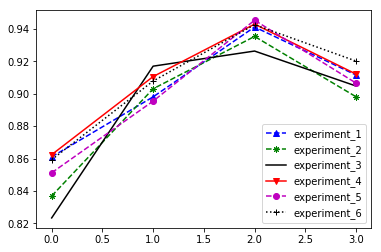

In [408]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(experiment_1,c='b',marker="^",ls='--',label='experiment_1')
ax.plot(experiment_2,c='g',marker=(8,2,0),ls='--',label='experiment_2')
ax.plot(experiment_3,c='k',ls='-',label='experiment_3')
ax.plot(experiment_4,c='r',marker="v",ls='-',label='experiment_4')
ax.plot(experiment_5,c='m',marker="o",ls='--',label='experiment_5')
ax.plot(experiment_6,c='k',marker="+",ls=':',label='experiment_6')
plt.legend(loc=4)
plt.show()

A partir dos resultados obtidos pelos experimentos, o experimento 4, utilizando o*DecisionTreeClassifier* com *Unigram* (a partir do *CountVectorizer*) foi o que obteve melhor resultado (a partir da métrica F1 Score).